In [9]:
pip install ucimlrepo

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
rice = fetch_ucirepo(id=545) 
  
# data (as pandas dataframes) 
x = rice.data.features 
y = rice.data.targets 
  
# metadata 
print(rice.metadata) 
  
# variable information 
print(rice.variables) 


{'uci_id': 545, 'name': 'Rice (Cammeo and Osmancik)', 'repository_url': 'https://archive.ics.uci.edu/dataset/545/rice+cammeo+and+osmancik', 'data_url': 'https://archive.ics.uci.edu/static/public/545/data.csv', 'abstract': "A total of 3810 rice grain's images were taken for the two species, processed and feature inferences were made. 7 morphological features were obtained for each grain of rice.", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 3810, 'num_features': 7, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5MW4Z', 'creators': [], 'intro_paper': {'ID': 276, 'type': 'NATIVE', 'title': 'Classification of Rice Varieties Using Artificial Intelligence Methods', 'authors': 'Ilkay Cinar, M. Koklu', 'venue': 'International Journal of Intel

In [11]:
x.shape

(3810, 7)

In [12]:
y.shape

(3810, 1)

In [13]:
x.iloc[:10,:]

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024
5,13479,477.015991,200.053055,86.650291,0.901328,13786,0.657897
6,15757,509.281006,207.296677,98.336136,0.880323,16150,0.589708
7,16405,526.570007,221.612518,95.436707,0.902521,16837,0.658888
8,14534,483.640991,196.650818,95.050682,0.875429,14932,0.649651
9,13485,471.570007,198.272644,87.727287,0.896789,13734,0.572320


In [14]:
y.iloc[:10,:]

,Class
0,Cammeo
1,Cammeo
2,Cammeo
3,Cammeo
4,Cammeo
5,Cammeo
6,Cammeo
7,Cammeo
8,Cammeo
9,Cammeo


In [15]:
x.isnull().sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
dtype: int64

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')


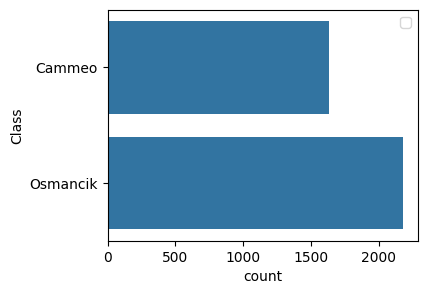

In [17]:
plt.figure(figsize=(4,3))
sns.countplot(y['Class'])
plt.legend()
plt.show()

In [18]:
y['Class'].value_counts().index

Index(['Osmancik', 'Cammeo'], dtype='object', name='Class')

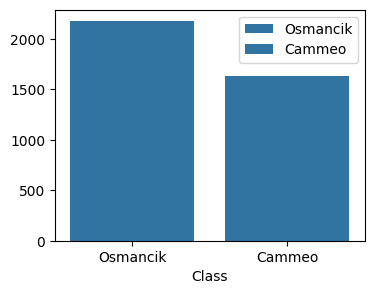

In [19]:
plt.figure(figsize=(4,3))
sns.barplot(x=y['Class'].value_counts().index,
            y= y['Class'].value_counts().values,
            label = y['Class'].value_counts().index)
plt.show()


In [20]:
x


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024
...,...,...,...,...,...,...,...
3805,11441,415.858002,170.486771,85.756592,0.864280,11628,0.681012
3806,11625,421.390015,167.714798,89.462570,0.845850,11904,0.694279
3807,12437,442.498993,183.572922,86.801979,0.881144,12645,0.626739
3808,9882,392.296997,161.193985,78.210480,0.874406,10097,0.659064


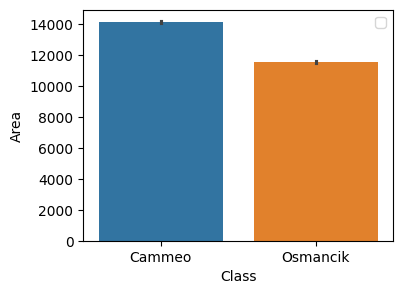

In [21]:
plt.figure(figsize=(4,3))
sns.barplot(x=y['Class'],y=x['Area'],hue = y['Class'])
plt.legend()
plt.show()

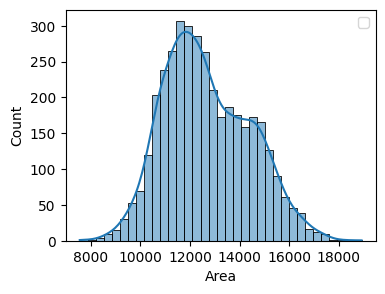

In [22]:
plt.figure(figsize=(4,3))
sns.histplot(x=x['Area'],kde=True)
plt.legend()
plt.show()

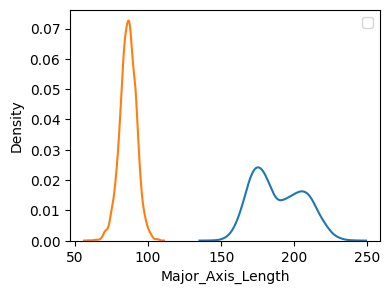

In [23]:
plt.figure(figsize=(4,3))
sns.kdeplot(x['Major_Axis_Length'])
sns.kdeplot(x['Minor_Axis_Length'])
plt.legend()
plt.show()

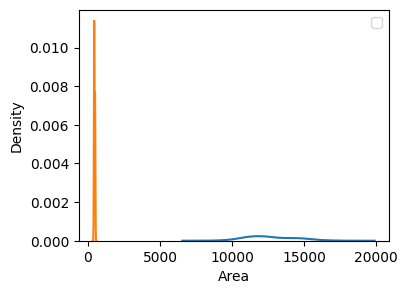

In [24]:
plt.figure(figsize=(4,3))
sns.kdeplot(x['Area'])
sns.kdeplot(x['Perimeter'])
plt.legend()
plt.show()

In [25]:
x['Area'].mean()

np.float64(12667.727559055118)

In [26]:
rice

{'data': {'ids': None,
  'features':        Area   Perimeter  Major_Axis_Length  ...  Eccentricity  Convex_Area    Extent
  0     15231  525.578979         229.749878  ...      0.928882        15617  0.572896
  1     14656  494.311005         206.020065  ...      0.895405        15072  0.615436
  2     14634  501.122009         214.106781  ...      0.912118        14954  0.693259
  3     13176  458.342987         193.337387  ...      0.891861        13368  0.640669
  4     14688  507.166992         211.743378  ...      0.906691        15262  0.646024
  ...     ...         ...                ...  ...           ...          ...       ...
  3805  11441  415.858002         170.486771  ...      0.864280        11628  0.681012
  3806  11625  421.390015         167.714798  ...      0.845850        11904  0.694279
  3807  12437  442.498993         183.572922  ...      0.881144        12645  0.626739
  3808   9882  392.296997         161.193985  ...      0.874406        10097  0.659064
  3809  

In [27]:
lab_enc = LabelEncoder()
y['Class'] = lab_enc.fit_transform(y['Class'])


In [28]:
#not in use in thise file just for learning one more methodes of feature encoding
pd.get_dummies(y['Class'],prefix="Class",dtype=int)

,Class_0,Class_1
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
3805,0,1
3806,0,1
3807,0,1
3808,0,1


In [29]:
# normalise
s_scale =StandardScaler()
x_train_scaled = s_scale.fit_transform(x)
s_scale


StandardScaler()

In [30]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)


KNeighborsClassifier()

In [32]:
knn_pred = knn.predict(x_test)
knn_pred[:10]


array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [33]:
y_test[:10]

,Class
3463,1
3551,1
1700,1
2733,1
1116,0
3368,1
1070,0
2455,1
217,0
1099,0


In [34]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,knn_pred)*100

89.32633420822397

In [35]:
# how to draw confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,knn_pred)

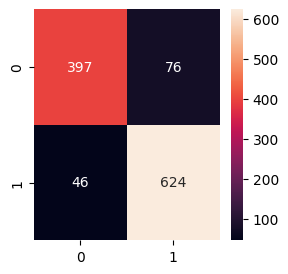

In [36]:
plt.figure(figsize=(3,3))
sns.heatmap(cm,annot= True,fmt='d')
plt.show()


In [37]:
#0 = false 1 = true
y = 425+86+580+52
print(y)

# accuracy score
acc = 425+580/1143
print(acc)

error = 1-acc
print(error)

precision= 580/580+52
print(precision)

recall= 580/580+86
print(recall)

f1_score= 2*precision*recall
print(f1_score)


1143
425.5074365704287
-424.5074365704287
53.0
87.0
9222.0


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test,knn_pred))


              precision    recall  f1-score   support

           0       0.90      0.84      0.87       473
           1       0.89      0.93      0.91       670

    accuracy                           0.89      1143
   macro avg       0.89      0.89      0.89      1143
weighted avg       0.89      0.89      0.89      1143



In [39]:
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [40]:
y_pred = log_model.predict(x_test)
y_pred[:10]

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [41]:
y_test[:10]

,Class
3463,1
3551,1
1700,1
2733,1
1116,0
3368,1
1070,0
2455,1
217,0
1099,0


In [42]:
accuracy_score(y_test,y_pred)*100

93.35083114610674

In [43]:
log_model.score(x_test,y_test)*100


93.35083114610674

In [44]:
log_model.score(x_train,y_train)*100

93.02587176602924

In [45]:
# support vector machine
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm.fit(x_train,y_train)

SVC(kernel='linear')

In [46]:
svm_pred = svm.predict(x_test)
svm_pred[:10]

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [47]:
y_test[:10]

,Class
3463,1
3551,1
1700,1
2733,1
1116,0
3368,1
1070,0
2455,1
217,0
1099,0


In [ ]:
accuracy_score(y_test,y_pred)*100

93.35083114610674

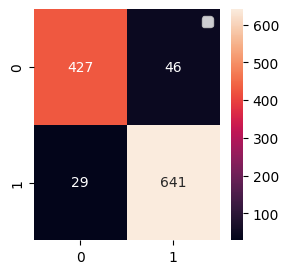

In [49]:
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(y_test,svm_pred),annot=True,fmt='d')
plt.legend()
plt.show()

In [65]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       473
           1       0.93      0.96      0.94       670

    accuracy                           0.93      1143
   macro avg       0.93      0.93      0.93      1143
weighted avg       0.93      0.93      0.93      1143



In [50]:
# naive byes
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(x_train,y_train)

GaussianNB()

In [51]:
naive_pred = nb_clf.predict(x_test)

In [52]:
naive_pred[:10]

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [53]:
accuracy_score(naive_pred,y_test)*100

91.95100612423447

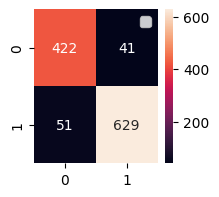

In [54]:
plt.figure(figsize=(2,2))
sns.heatmap(confusion_matrix(naive_pred,y_test),annot=True,fmt='d')
plt.legend()
plt.show()

In [66]:
print(classification_report(y_test,naive_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90       473
           1       0.93      0.94      0.93       670

    accuracy                           0.92      1143
   macro avg       0.92      0.92      0.92      1143
weighted avg       0.92      0.92      0.92      1143



In [55]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
tree = dtree.predict(x_test)

In [57]:
tree[:10]

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [58]:
accuracy_score(tree,y_test)*100

89.93875765529309

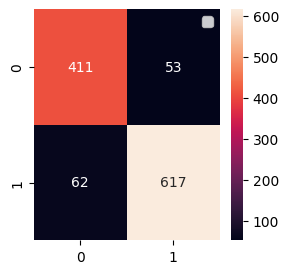

In [59]:
plt.figure(figsize=(3,3))
sns.heatmap(confusion_matrix(tree,y_test),annot=True,fmt='d')
plt.legend()
plt.show()

In [67]:
print(classification_report(y_test,tree))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       473
           1       0.91      0.92      0.91       670

    accuracy                           0.90      1143
   macro avg       0.90      0.89      0.90      1143
weighted avg       0.90      0.90      0.90      1143



In [60]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
forest.fit(x_train,y_train)


RandomForestClassifier()

In [61]:
forest_pred = forest.predict(x_test)

In [62]:
forest_pred[:10]

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 0])

In [63]:
accuracy_score(forest_pred,y_test)*100

93.00087489063867

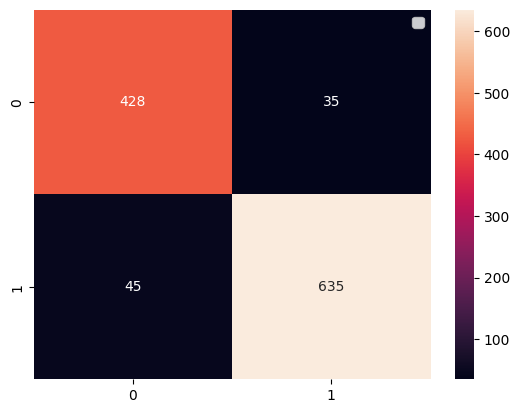

In [64]:
plt.Figure(figsize=(1,1))
sns.heatmap(confusion_matrix(forest_pred,y_test),annot=True,fmt='d')
plt.legend()
plt.show()

In [68]:
print(classification_report(y_test,forest_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       473
           1       0.93      0.95      0.94       670

    accuracy                           0.93      1143
   macro avg       0.93      0.93      0.93      1143
weighted avg       0.93      0.93      0.93      1143

